#### 1. Load the data

In [1]:
import pandas as pd

# Load the dataset
file_path = 'activities_cleaned.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.columns

(   Activity ID Activity Type   Begin Timestamp     End Timestamp  \
 0   2284658991       Running   4/11/2017 12:07   4/11/2017 13:06   
 1   2284658936       Running    3/11/2017 9:47   3/11/2017 10:35   
 2   2228102647       Running  25/10/2017 16:31  25/10/2017 17:11   
 3   2104984694       Running  13/10/2017 11:53  13/10/2017 12:41   
 4   2084195352       Running   2/10/2017 14:51   2/10/2017 15:38   
 
    Max. Elevation (Raw)  Min. Elevation (Raw)  Elevation Gain (Raw)  \
 0                 472.6                 472.6                 315.0   
 1                 473.2                 473.2                 245.0   
 2                 278.8                 278.8                 208.0   
 3                 471.6                 471.6                 246.0   
 4                 494.6                 494.6                 246.0   
 
    Elevation Loss (Raw)  Average Heart Rate (bpm)  Max. Heart Rate (bpm).1  \
 0                 314.0                       182                     

### 2. Data Preprocessing: 
- Computing Distance, Elevation Gain, Duration, and Pace.
- Model Training
- Model Evaluation

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Data Preprocessing
# Convert Duration from h:m:s to seconds
def convert_duration_to_seconds(duration_str):
    h, m, s = map(int, duration_str.split(':'))
    return h * 3600 + m * 60 + s

# Apply conversion
data['Duration (seconds)'] = data['Duration (h:m:s)'].apply(convert_duration_to_seconds)

# Calculate Pace (minutes per kilometer)
data['Pace (min/km)'] = (data['Duration (seconds)'] / 60) / (data['Distance (Raw)'])

# Selecting features and target variable
features = data[['Distance (Raw)', 'Elevation Gain (Raw)', 'Pace (min/km)']]
target = data['Duration (seconds)']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, predictions)
    results[name] = mae

results


{'Linear Regression': 384.18344974486314,
 'Decision Tree': 123.58064516129032,
 'Random Forest': 149.92225806451611}

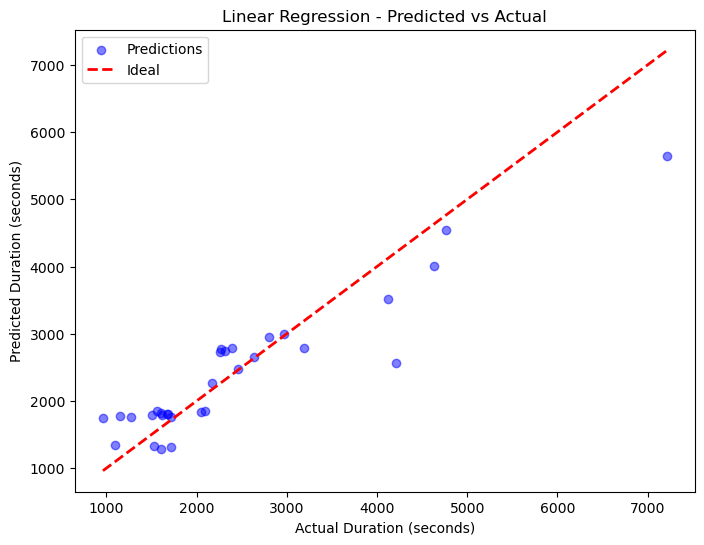

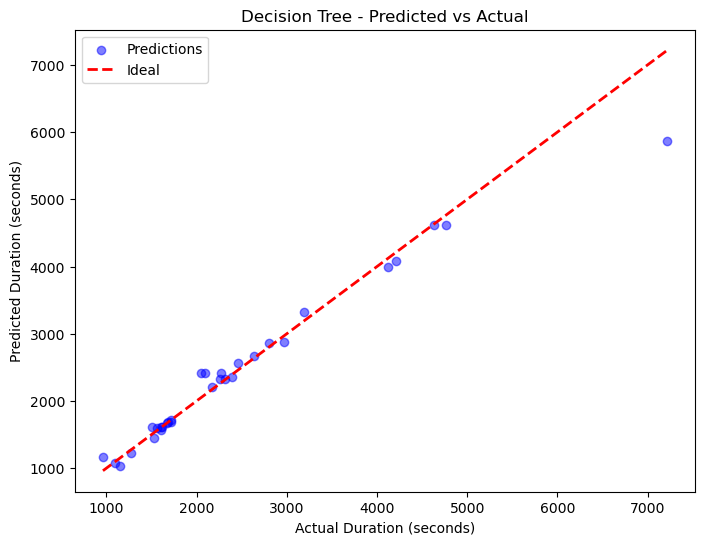

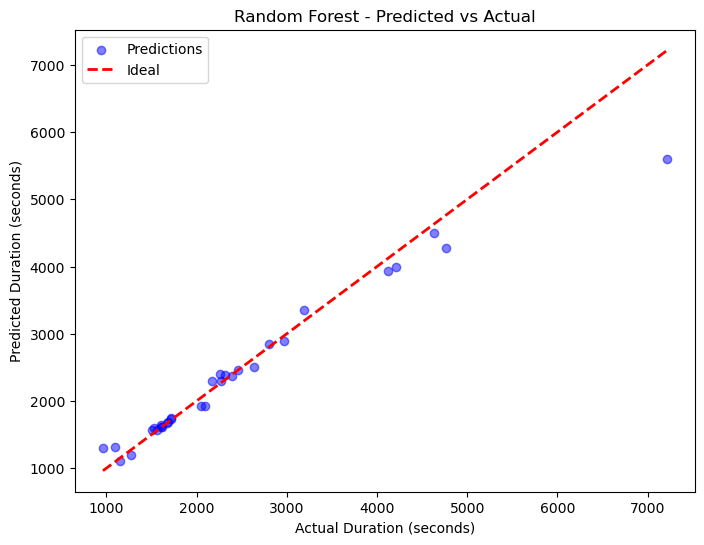

{'Linear Regression': {'MAE': 384.18344974486314,
  'MSE': 287854.0088153058,
  'R2': 0.8351608634407605},
 'Decision Tree': {'MAE': 123.58064516129032,
  'MSE': 72503.25806451614,
  'R2': 0.9584811255320927},
 'Random Forest': {'MAE': 149.92225806451611,
  'MSE': 105149.44218387094,
  'R2': 0.9397863405459951}}

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Function to plot results and compute evaluation metrics
def evaluate_model(name, model, X_test_scaled, y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.5, label='Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
    plt.title(f"{name} - Predicted vs Actual")
    plt.xlabel('Actual Duration (seconds)')
    plt.ylabel('Predicted Duration (seconds)')
    plt.legend()
    plt.show()
    
    return {'MAE': mae, 'MSE': mse, 'R2': r2}

# Evaluate each model
evaluation_results = {}

for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    evaluation_results[name] = evaluate_model(name, model, X_test_scaled, y_test, predictions)

evaluation_results


### Results
The results show the evaluation metrics—Mean Absolute Error (MAE), Mean Squared Error (MSE), and R²—used to assess the performance of three predictive models (Linear Regression, Decision Tree, and Random Forest) for predicting running duration.

1. Linear Regression
- MAE: 384.18 seconds (average absolute error in predictions)
- MSE: 287,854.01 (squared error, penalizes larger errors more)
- R²: 0.84 (84% of the variance in running duration is explained by the model)
The linear regression model performed reasonably well, explaining a good portion of the variance, though it has the highest MAE and MSE compared to the other models.

2. Decision Tree
- MAE: 123.58 seconds (lower than linear regression)
MSE: 72,503.26 (lowest among the models)
R²: 0.96 (96% of variance explained, best among all models)
The decision tree performed the best overall, with the lowest errors and the highest R² score. It provides more accurate predictions with a smaller average error.

3. Random Forest
MAE: 149.92 seconds (better than linear regression, slightly worse than decision tree)
MSE: 105,149.44
R²: 0.94 (94% of variance explained)
The random forest also performed well, with better performance than linear regression but slightly worse than the decision tree. It still offers good predictive power.

Conclusion:
The Decision Tree model is the most accurate, achieving the lowest errors (MAE, MSE) and highest R² score, meaning it can predict the running duration most effectively based on distance, elevation gain, and pace.

### Conclusion:
The Decision Tree Regressor performed the best with the lowest MAE of 123.58 seconds, making it the most accurate model among the three for predicting the running duration based on distance, elevation gain, and pace.